<a href="https://colab.research.google.com/github/HayalAhl/Predict-the-popularity-of-a-new-song-based-on-a-dataset-of-30-000-songs/blob/main/Projet_PythonA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project : Predict the popularity of a new song based on a dataset of 30'000 songs

## Introduction to Dataset Analysis

This study explores a dataset comprising several key variables related to music tracks and playlist characteristics. The dataset offers insights into numerous attributes, including the song's specifics, artist details, playlist information, and various musical features. Below is an overview of the essential columns and their descriptions:


### Variable Descriptions:

- **track_id**: Unique ID for each song.
- **track_name**: Name of the song.
- **track_artist**: Artist(s) associated with the song.
- **track_popularity**: Song popularity score ranging from 0 to 100, where higher scores indicate higher popularity.
- **track_album_id**: Unique ID for the album associated with the song.
- **track_album_name**: Name of the album.
- **track_album_release_date**: Date of the album release.
- **playlist_name**: Name of the playlist.
- **playlist_id**: Unique ID for the playlist.
- **playlist_genre**: Genre of the playlist.
- **playlist_subgenre**: Subgenre of the playlist.
- **danceability**: Describes the suitability of a track for dancing based on various musical elements. Ranges from 0.0 (least danceable) to 1.0 (most danceable).
- **energy**: Represents the intensity and activity of a track, ranging from 0.0 to 1.0.
- **key**: Estimated overall key of the track mapped using standard Pitch Class notation.
- **loudness**: Overall loudness of the track in decibels (dB), with values typically between -60 and 0 dB.
- **mode**: Indicates the modality (major or minor) of the track, represented by 1 for major and 0 for minor.
- **speechiness**: Detects the presence of spoken words in a track, ranging from 0.0 to 1.0.
- **acousticness**: Confidence measure of whether the track is acoustic, ranging from 0.0 to 1.0.
- **instrumentalness**: Predicts whether a track contains no vocals, ranging from 0.0 to 1.0.
- **liveness**: Detects the presence of an audience in the recording, with higher values indicating a higher probability that the track was performed live.
- **valence**: Describes the musical positiveness conveyed by a track, ranging from 0.0 to 1.0.
- **tempo**: Estimated tempo of a track in beats per minute (BPM).
- **duration_ms**: Duration of the song in milliseconds.

This dataset offers a comprehensive perspective on musical attributes, artist details, and playlist characteristics, enabling in-depth analysis and exploration of various music-related trends and patterns.

###Objectifs

Our main objective is to explore and analyze in depth the music dataset we have available. Using advanced data analysis techniques, we seek to understand the characteristics that most contribute to a music's popularity.

To do this, we plan to use machine learning methods to create a predictive model. This model should be able, based on various information about a song (such as musical genres, beats, lyrics, etc.), to accurately predict its likely popularity level.

Our end goal is to provide users with a reliable and accurate tool that will allow them to estimate the potential popularity of new music, which would be of great value to artists, record labels and streaming platforms. By leveraging this data intelligently, we hope to provide valuable insights for the music industry and help better understand the factors that influence a song's success.

##Libraries

Here is the list of libraries that we will use. There are useful libraries for data exploitation, such as numpy and pandas. Many visualization libraries like matplotlib, plotly express and seaborn. And finally machine learning libraries to make predictions about the popularity of future music.

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import json
import seaborn as sns
import plotly.graph_objects as go
from collections import Counter
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from PIL import Image
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [158]:



warnings.filterwarnings('ignore')

##Transform the data :

###Importation

Adding the DataFrame easily by using pandas library

In [159]:
dataset = pd.read_csv("spotify_songs.csv")

###Sumary

Here is the head of the 5 first rows of our dataset. We can also see the nouns of the columns and the values that can be in.

In [160]:
dataset.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


This command can help us to see if there is null value in ouf dataset. We will clean the row with missing value. There is 5 missing values in the column track_name, track_artist and track_album_name. We can also see the type of each columns.

In [161]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

An other view to visulize the number of null values.

In [162]:
dataset.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

###Transformation

We have rename all the columns to be clearer.

In [163]:
data_clean = dataset
data_clean.rename(columns={"track_id" : "Id",
                          "track_name" : "Name",
                          "track_artist" : "Artist",
                          "track_popularity" : "Popularity",
                          "track_album_id" : "Album",
                          "track_album_name" : "Album Name",
                          "track_album_release_date" : "Date",
                          "playlist_name" : "Playlist Name",
                          "playlist_id" : "Playlist Id",
                          "playlist_genre" : "Playlist Genre",
                          "playlist_subgenre" : "Playlist Sub-Genre",
                           "danceability" : "Danceability",
                           "energy" : "Energy",
                           "key" : "Key",
                           "loudness" : "Loudness",
                           "mode" : "Mode",
                           "speechiness" : "Speechiness",
                           "acousticness" : "Acousticness",
                           "instrumentalness" : "Instrumentalness",
                           "liveness" : "Liveness",
                           "valence" : "Valence",
                           "tempo" : "Tempo",
                           "duration_ms" : "Duration"
                          }
                  ,inplace=True
                 )
dataset

,Id,Name,Artist,Popularity,Album,Album Name,Date,Playlist Name,Playlist Id,Playlist Genre,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


Now we drop the null values.

In [164]:
data_clean.dropna(subset= ["Name"], inplace=True)

We should have now no null value, let check it !

In [165]:
data_clean.isnull().sum()

Id                    0
Name                  0
Artist                0
Popularity            0
Album                 0
Album Name            0
Date                  0
Playlist Name         0
Playlist Id           0
Playlist Genre        0
Playlist Sub-Genre    0
Danceability          0
Energy                0
Key                   0
Loudness              0
Mode                  0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration              0
dtype: int64

We will now create a new dataset so that all the music is unique

In [166]:
data_unique = data_clean.drop_duplicates(subset='Id', keep='first')

Here's a new Popularity Label column for more clarity

In [167]:
data_clean['Popularity_Label'] = data_clean['Popularity'].apply(lambda x: 'very popular' if x > 80 else ('popular' if x > 60 else ('average' if 30 <= x <= 60 else 'not popular')))


####Lets create new usefull dataset :

##### Let's create columns: day, month number, month, year, season

In [168]:
data_clean['Date'] = pd.to_datetime(data_clean['Date'])
data_clean['Month'] = data_clean['Date'].dt.month_name()
data_clean['Year'] = data_clean['Date'].dt.year

In [169]:
def map_to_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Summer'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Winter'

In [170]:
data_clean['Season'] = data_clean['Month'].apply(map_to_season)

##Basics graphs :

###Averages and main statistics

In [171]:
data_clean.describe()

,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration,Year
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
mean,42.483551,0.654850,0.698603,5.373949,-6.719529,0.565737,0.107053,0.175352,0.084760,0.190175,0.510556,120.883642,225796.829779,2011.136834
std,24.980476,0.145092,0.180916,3.611572,2.988641,0.495667,0.101307,0.219644,0.224245,0.154313,0.233152,26.903632,59836.492346,11.418226
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,1957.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171250,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.961000,187804.500000,2008.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000,2016.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918250,253581.250000,2019.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000,2020.000000


Here is some interesting information about this dataset. First of all, the average popularity is 42 and the median is 45. If we consider popular music as music with a popularity of more than 80, we can conclude that this dataset contains less than 25% popular music.

The danceability is quite high on average, it is 0.65, which represents a danceability of 65%, therefore rather danceable. There are notably 75% of values ​​above 0.56, which means that the vast majority of music produced, independent of its success, is rather danceable music.

Regarding energy, we will find the same thing as for danceability.

The Liveness column informs us that most of the music in this dataset is not music recorded live, that is to say, during a concert or festival for example.

Concerning Valence, we can see that there is a fairly good balance between sad and happy music in this dataset. This column is very diverse.

By looking at the median of the date, we observe that it is equal to 2016. For a dataset whose dates go from 1957 to 2020, we can see that the majority of our data is quite recent, and more concentrated between 2016 and 2020. We must keep in mind that the data concerning dates must be analyzed with caution because we do not have the same density of data depending on the year.



###Top 10 of genre

One of the first data that we wanted to analyze was the different styles of music. We observed that each music was in a playlist and that each playlist was placed in a musical genre category. We can therefore conclude that this music belongs to this genre, and based on this principle, we will take the average of each musical genre

In [172]:
genre_popularity = data_clean.groupby('Playlist Genre')['Popularity'].mean().reset_index()
top_genres = genre_popularity.sort_values(by='Popularity', ascending=False).head(10)

fig = px.bar(top_genres, x='Playlist Genre', y='Popularity', title='Top 10 Most Popular Genres',
             labels={'Popularity': 'Average Popularity'},
             color='Popularity', color_continuous_scale='viridis')
fig.show()

Ranked in order of popularity, it is the pop genre which obtains the best average popularity, closely followed by the Latin style.

Note also that the average remains quite low, it is only 47 for popularity for the pop genre. Making music in this genre is therefore not enough to create popular music

###What are the bestsellers

As we were able to quote previously, we will only consider music as popular if and only if its **popularity exceeds 75**

Lets see together the top 10 of the bestsellers, but also the number of bestsellers (Popularity>75)

In [173]:
bestsellers = data_unique[data_unique['Popularity'] > 75].sort_values(by='Popularity', ascending=False)


filtered_songs = data_unique[(data_unique['Popularity'] >= 75) & (data_unique['Popularity'] <= 100)]

top_songs = filtered_songs.sort_values(by='Popularity', ascending=False).head(10)

fig = px.bar(top_songs, x='Name', y='Popularity', color='Popularity',
             hover_data=['Artist', 'Album'],
             labels={'Popularity': 'Song Popularity'},
             title='Top 10 Most Popular Songs (Popularity: 75-100)')

fig.update_yaxes(range=[95, 100])

fig.update_layout(xaxis_title='Song Name', yaxis_title='Popularity', coloraxis_colorbar=dict(title='Popularity'))
fig.show()

Thus the bestseller is the song: "Dance Monkey - Tones And I".

We can see that out of the top 10 most popular sounds, 8 of them are pop music.

Lets count the number of bestsellers depending of their musical genre :

In [174]:
genre_count = bestsellers.groupby('Playlist Genre').size().reset_index(name='Count')
genre_count_sorted = genre_count.sort_values(by='Count', ascending=False)
fig = px.bar(genre_count_sorted, x='Playlist Genre', y='Count', title='Number of bestsellers depending of the Genre')
fig.update_xaxes(title='Playlist Genre')
fig.update_yaxes(title='Count of song')

fig.show()

There is much more popular pop music in our dataset. But we should look at the percentage of bestsellers in pop music compared to other styles. So we can see if the pop style has more chance of becoming popular.

In [175]:
total_songs_per_genre = data_unique.groupby('Playlist Genre').size().reset_index(name='TotalCount')

bestsellers_count = bestsellers.groupby('Playlist Genre').size().reset_index(name='BestsellersCount')

genre_stats = total_songs_per_genre.merge(bestsellers_count, on='Playlist Genre', how='left')

genre_stats['PercentageBestsellers'] = (genre_stats['BestsellersCount'] / genre_stats['TotalCount']) * 100
genre_stats = genre_stats.sort_values(by='PercentageBestsellers', ascending=False)

fig = px.bar(genre_stats, x='Playlist Genre', y='PercentageBestsellers',
             title='Percentage of bestsellers by playlist genre',
             labels={'PercentageBestsellers': 'Percentage of Bestsellers', 'Playlist Genre': 'Playlist Genre'})

fig.update_xaxes(title='Playlist Genre')
fig.update_yaxes(title='Percentage of Bestsellers')
fig.show()


Thanks to this graph, we can see that almost 4.5% of pop music is considered bestsellers. Which is a huge difference (3 times more than the second style, the Latin style). Here, we can therefore conclude that pop music will have a much greater chance of being a bestseller, especially if we combine this graph with the average popularity by genre, where the pop genre was already in the lead.

###Most listened playlist

In this part, we will analyze different data on our playlists. We will see the musical genres present, the top playlists, as well as the most common music

Here is a graph representing the number of music from our dataset present in each playlist.

The 'Indie Poptimism' playlist is the one that contains the most sounds in our dataset with a total of 308 songs

In [176]:
top_playlists = data_clean['Playlist Name'].value_counts().head(10)
df_top_playlist = pd.DataFrame(top_playlists)
styled_df_head = df_top_playlist.style.background_gradient(cmap='Reds').set_properties(**{'text-align': 'center'})
styled_df_head

,Playlist Name
Indie Poptimism,308
2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,247
Permanent Wave,244
Hard Rock Workout,219
Ultimate Indie Presents... Best Indie Tracks of the 2010s,198
Fitness Workout Electro | House | Dance | Progressive House,195
Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Pop 2020🔥Popular Music🔥Clean Pop 2020🔥Sing Alongs,189
Southern Hip Hop,189
"Classic Rock 70s 80s 90s, Rock Classics - 70s Rock, 80s Rock, 90s Rock Rock Classicos",182
Urban Contemporary,170


###Top music of playlist

Here is the top 10 music that comes back most often with in first place, the music 'Dance Monkey' by 'Tones and I' which comes back with a rate of 17%. We can therefore imagine that she is very popular (she has a popularity of 100, this song is also the most popular song of our dataset)

In [177]:
top_music_by_playlist = data_clean.groupby('Playlist Id').apply(lambda x: f"{x['Artist'].iloc[0]} - {x['Name'].iloc[0]}").value_counts().nlargest(10)

percentages = top_music_by_playlist / top_music_by_playlist.sum() * 100

#Create an interactive pie chart with Plotly Express
fig = px.pie(names=percentages.index,
             values=percentages.values,
             title='Top 10 Most Popular Songs in Playlists',
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_traces(textinfo='percent', pull=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0.1])

fig.show()

###The most present genre by playlist

Let's analyze the frequency of playlist types to see which genre of music gives rise to the greatest number of playlists.

We can see an almost perfect balance between different genres of music. (almost 16.67% for each style)

In [178]:
genre_frequency_per_playlist = data_clean.groupby(['Playlist Name', 'Playlist Genre']).size().reset_index(name='count')

#The average genre frequency
average_genre_count = genre_frequency_per_playlist.groupby('Playlist Genre')['count'].mean().sort_values(ascending=False)

percentages = (average_genre_count / average_genre_count.sum()) * 100

sorted_genres = average_genre_count.index
values = [percentages[genre] for genre in sorted_genres]


fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r=values,
    theta=sorted_genres,
    fill='toself',
    name='Average Genre Frequency'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 20]
        )
    ),
    showlegend=True,
    title_text='Average Genre Frequency by Playlist'
)
fig.show()


##Correlation

###Basics correlation

Let's now analyze the different components of music to see if correlations exist and if so, see if there is a possibility of predicting the popularity of music:

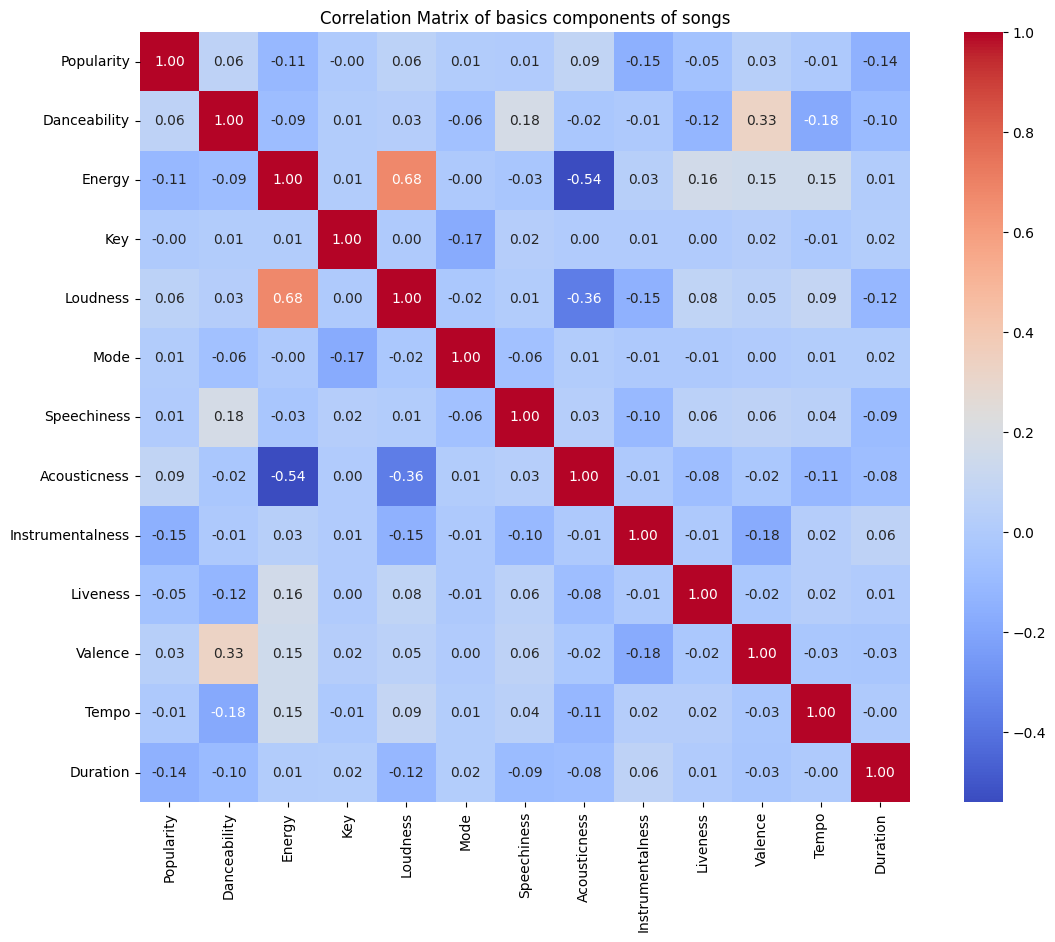

In [179]:
correlation_matrix = data_clean[["Popularity","Danceability","Energy","Key","Loudness","Mode","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo","Duration"]].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of basics components of songs')
plt.show()

We can see that there is very little correlation between the different components. This result did not satisfy us so we decided to analyze the correlations from another angle

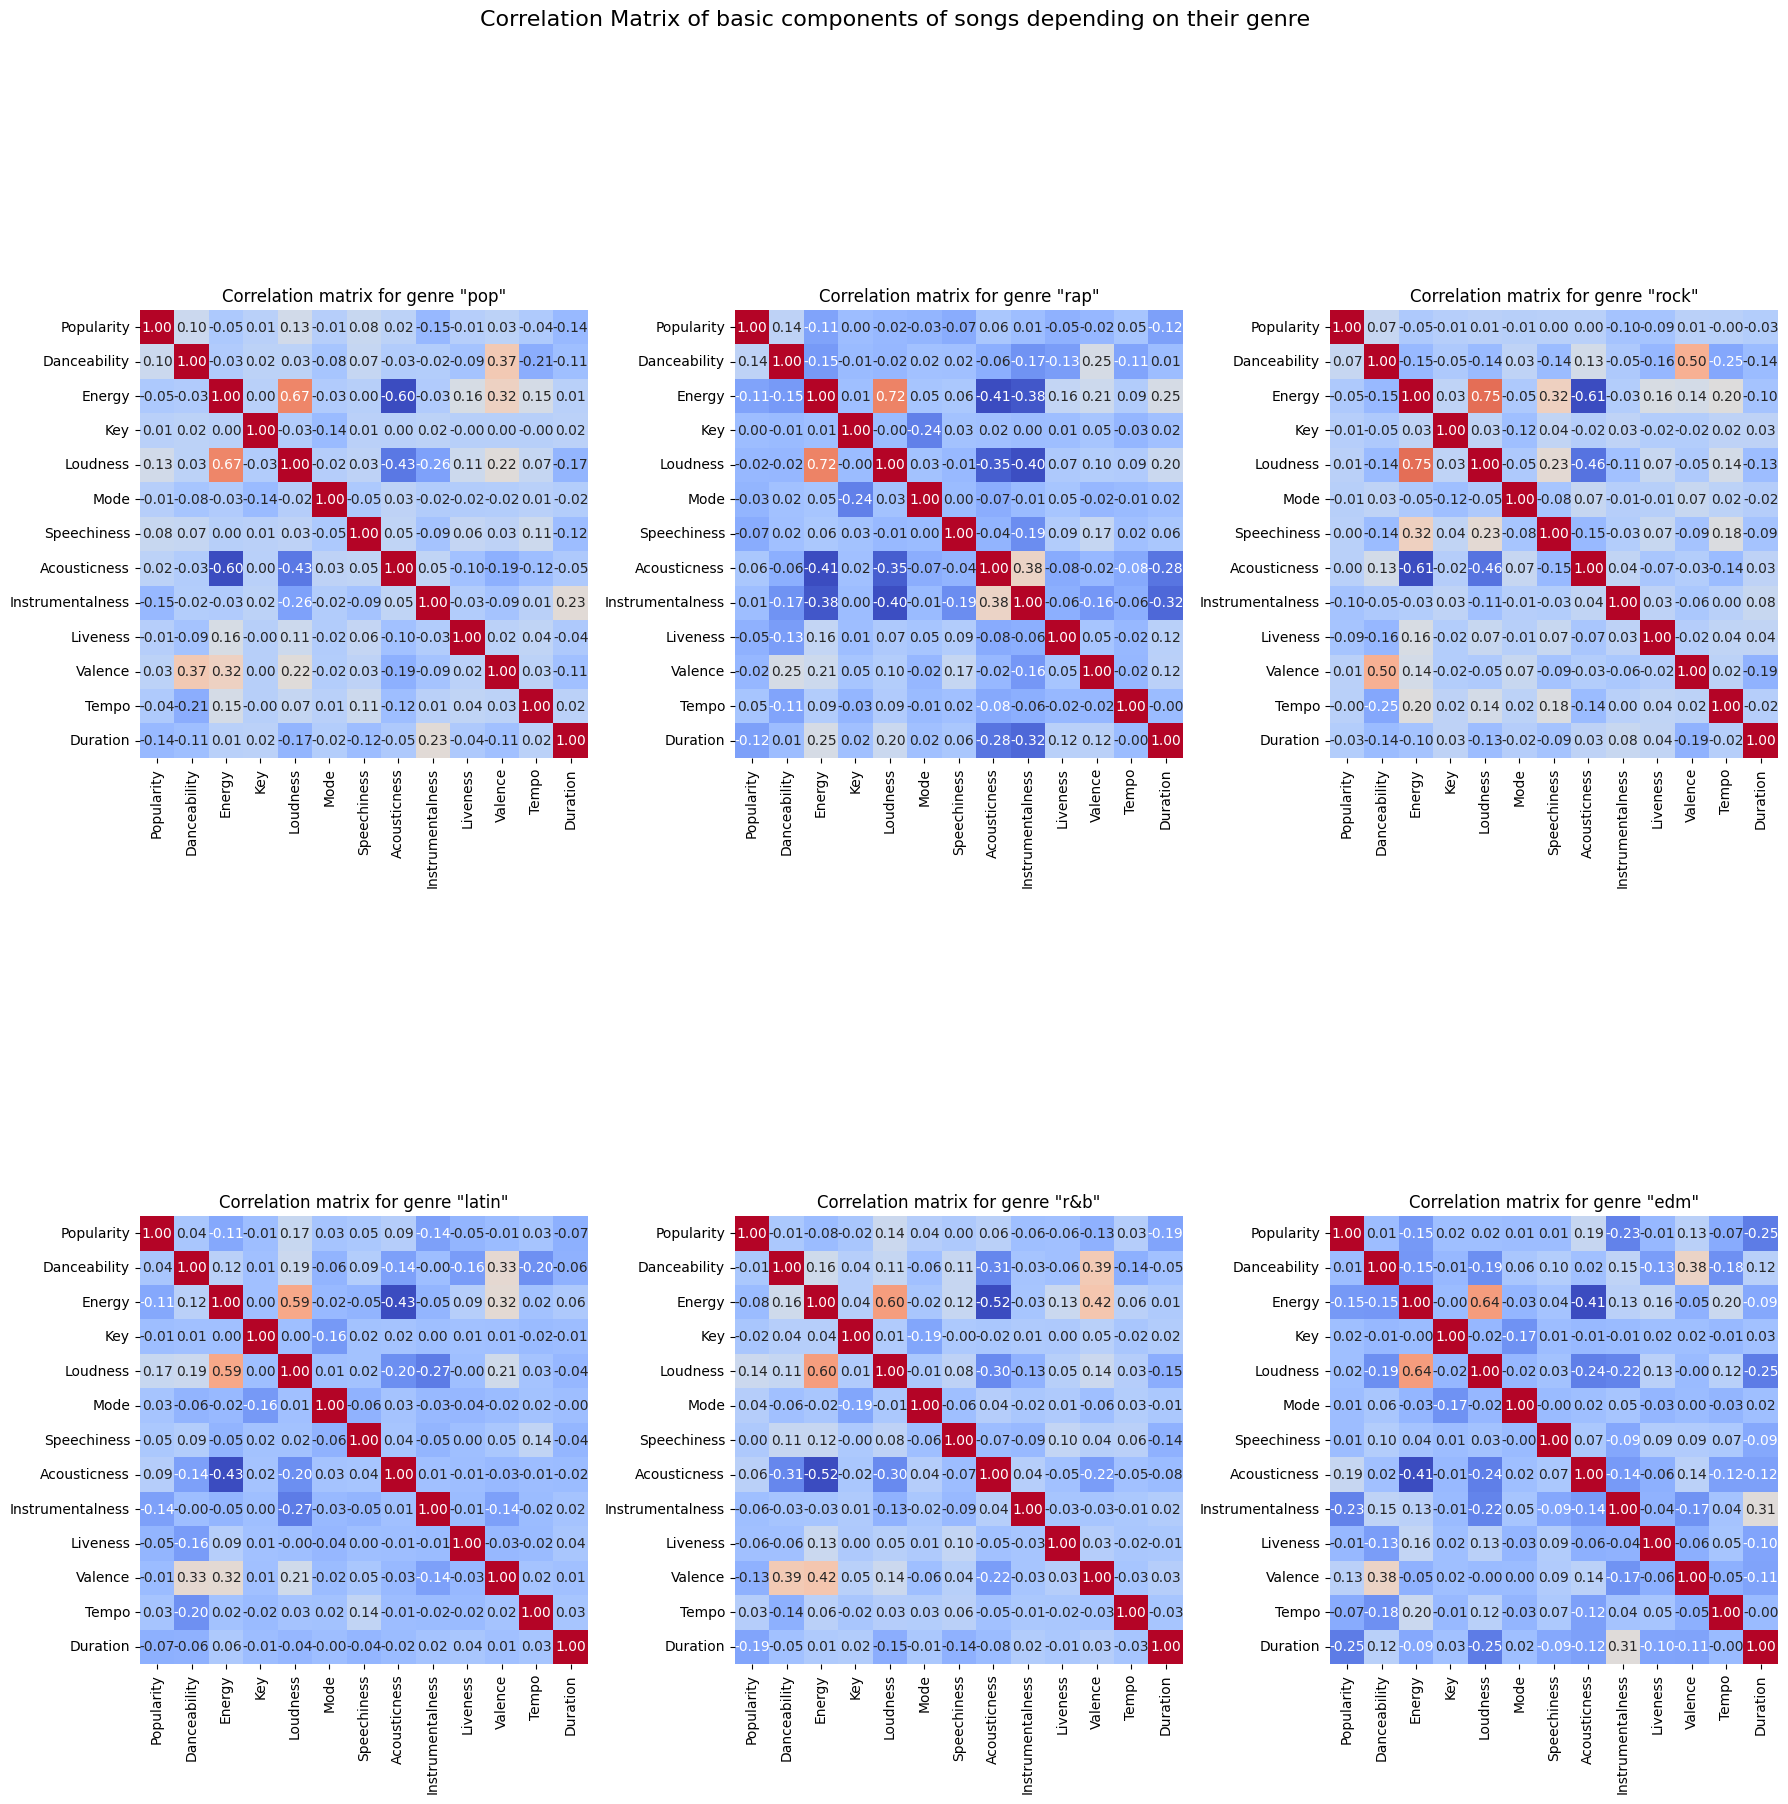

In [180]:
genres = data_clean['Playlist Genre'].unique()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 20))
fig.suptitle('Correlation Matrix of basic components of songs depending on their genre', fontsize=16)

for i, genre in enumerate(genres):
    genre_data = data_clean[data_clean['Playlist Genre'] == genre]
    correlation_matrix = genre_data[["Popularity", "Danceability", "Energy", "Key", "Loudness", "Mode", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration"]].corr()
    ax = axes[i // 3, i % 3]
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=ax, cbar=False)
    ax.set_title(f'Correlation matrix for genre "{genre}"')

plt.tight_layout()
plt.show()


Looking at the big picture, there is very little correlation between popularity and the different components based on genres.We can therefore imagine that it will be complicated to find a good prediction model, because the correlation does not seem obvious.

However, we can see that in each correlation, energy is always correlated with acoustiness and loudness. There is also a correlation between danceability and valence.

###Relationship with Danceability

Let's first look at the relationship between danceability and valence. We must obtain reliable trend curves because we have previously seen their correlation.(double click on the desired legend to make the others disappear)

Lets have a look to the sub-genre "album rock" wich have a great trendline and where we can well see the correlation.

In [181]:
fig = px.scatter(data_clean, x="Danceability", y="Valence", color="Playlist Genre",
          labels={"Playlist Genre":"genre"}, trendline="ols")
fig.update_layout(yaxis=dict(range=[0, 1]), xaxis=dict(range=[0, 1]),title='Relationship between Valence and Danceability by Genre')

fig.show()

But what we want to analyze is danceability based on popularity.Using the trend curve, we only have to look at this curve between the abscissa 80 and 100. We look at the y value of the curve and we obtain the danceability that music should have for it to be a bestseller according to its subgenre (double click on the desired legend to make the others disappear).


In [182]:
fig = px.scatter(bestsellers, y="Danceability", x="Popularity", color="Playlist Genre",
          labels={"Playlist Genre":"genre"}, trendline="ols")
fig.update_layout(
    yaxis=dict(range=[0, 1]),
    xaxis=dict(range=[75, 100]),
    title='Relationship between Popularity and Danceability by Genre'
)
fig.show()

Given that we only have a few bestsellers according to sub-genre, for this graph let's take into account the main genres

In [183]:
fig = px.scatter(bestsellers, y="Danceability", x="Popularity", color="Playlist Genre",
          labels={"Playlist Genre":"genre"}, trendline="ols")
fig.update_layout(yaxis=dict(range=[0, 1]), xaxis=dict(range=[75, 100]),title='Relationship with Danceability and popularity by genre')


fig.show()

For pop, values ​​between 0.66 and 0.76 would be required,

for Latin between 0.65 and 0.75,

for rap, values ​​close to 0.75,

for r&b, values ​​between 0.35 and 0.75,

finally for edm between 0.55 and 0.80

###Relationship with Energy

In the same way, we will analyze the energy based on popularity.

In [184]:
fig = px.scatter(bestsellers, y="Energy", x="Popularity", color="Playlist Genre",
          labels={"Playlist Genre":"genre"}, trendline="ols")
fig.update_layout(
    yaxis=dict(range=[0, 1]),
    xaxis=dict(range=[75, 100]),
    title='Relationship with Energy and popularity by genre'
)
fig.show()

###Relationship with Hapiness

Let's take a look at whether popular music is more often happy or sad music

In [185]:
fig = px.scatter(bestsellers, y="Valence", x="Popularity", color="Playlist Genre",
          labels={"Playlist Genre":"genre"}, trendline="ols")
fig.update_layout(
    yaxis=dict(range=[0, 1]),
    xaxis=dict(range=[75, 100]),
    title='Relationship with hapiness and popularity by genre'
)
fig.show()

We get trend lines, but we can also see that the dots are spread across the entire Y-axis, which means that popular music is just as happy as it is sad

##Analysis over the years

One area that we planned to explore was the impact of COVID on music and more particularly on valence, that is to say whether the music is sadder or happy.

Given that we did not have data after 2020, we still wanted to observe the emergence or not of sad music. we decided to study data only from 2000, because we had little data between 1950 and 2000. In order to have reliable values.

The first graph represents the valence of best sellers, while the second represents the emergence of sad songs over the years.

In [186]:
data_clean["Valence Boolean By Middle"] = data_clean["Valence"]>0.5

data_clean['Date'] = pd.to_datetime(data_clean['Date'])

filtered_data = data_clean[(data_clean['Date'].dt.year >= 1980) & (data_clean['Date'].dt.year <= 2021)]

total_records_per_year = filtered_data.groupby(filtered_data['Date'].dt.year).size()
false_data = filtered_data[filtered_data['Valence Boolean By Middle'] == False]
false_records_per_year = false_data.groupby(false_data['Date'].dt.year).size()

true_data = filtered_data[filtered_data['Valence Boolean By Middle'] == True]
true_records_per_year = true_data.groupby(true_data['Date'].dt.year).size()

percentage_false_per_year = (false_records_per_year / total_records_per_year) * 100
percentage_true_per_year = (true_records_per_year / total_records_per_year) * 100

fig = go.Figure()

fig.add_trace(go.Bar(x=percentage_false_per_year.index, y=percentage_false_per_year,
                     marker_color='skyblue', name='Sad'))

fig.add_trace(go.Bar(x=percentage_true_per_year.index, y=percentage_true_per_year,
                     marker_color='orange', name='Happy',
                     hoverinfo='y', texttemplate='%{y:.2f}%'))

z_false = np.polyfit(percentage_false_per_year.index, percentage_false_per_year, 1)
p_false = np.poly1d(z_false)
fig.add_trace(go.Scatter(x=percentage_false_per_year.index, y=p_false(percentage_false_per_year.index),
                         mode='lines', line=dict(color='blue', dash='dash'), name='Sad Trend'))

z_true = np.polyfit(percentage_true_per_year.index, percentage_true_per_year, 1)
p_true = np.poly1d(z_true)
fig.add_trace(go.Scatter(x=percentage_true_per_year.index, y=p_true(percentage_true_per_year.index),
                         mode='lines', line=dict(color='red', dash='dash'), name='Happy Trend'))

fig.update_layout(
    title='Annual percentage of sad and happy songs between 2000 and 2021 with trendlines',
    xaxis_title='Year',
    yaxis_title='Percentage (%)',
    xaxis=dict(tickmode='linear'),
    barmode='relative',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    hovermode='x'
)
fig.show()


This graph is very interesting, because we can observe the emergence of sad music.

###Relationship between music duration and popularity

In [187]:
data_clean['Duration_Min'] = data_clean['Duration'] / 60000
fig = px.histogram(data_clean, x='Duration_Min', color='Popularity_Label',
                   title='Relationship between Music Duration and Popularity',
                   labels={'Duration_Min': 'Music Duration (minutes)', 'Popularity_Label': 'Popularity'},
                   color_discrete_map={'Low': 'lightblue', 'Moderate': 'green', 'High': 'orange', 'Very High': 'red'})

fig.update_layout(title_text='Relationship between Music Duration and Popularity',
                  xaxis_title='Music Duration (minutes)',
                  yaxis_title=None,
                  yaxis=dict(tickvals=[]))

fig.show()

###Popularity over the years

In [188]:

df_genre_avg_popularity = data_clean.groupby(['Playlist Genre', 'Year'])['Popularity'].mean().reset_index()

# Fusionner la moyenne par an avec le DataFrame original

top_genres = df_genre_avg_popularity.groupby('Playlist Genre')['Popularity'].sum().sort_values(ascending=False).head(10).index

fig = go.Figure()

for genre in top_genres:
    genre_data = df_genre_avg_popularity[df_genre_avg_popularity['Playlist Genre'] == genre]
    fig.add_trace(go.Scatter(
        x=genre_data['Year'],
        y=genre_data['Popularity'],
        mode='lines',
        name=genre
    ))

fig.update_layout(
    title_text="Evolution of Genre Popularity Over Time"
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1 an",
                     step="year",
                     stepmode="backward"),
                dict(count=10,
                     label="10 ans",
                     step="year",
                     stepmode="backward"),
                dict(count=20,
                     label="20 ans",
                     step="year",
                     stepmode="backward"),
                dict(count=50,
                     label="50 ans",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()


Let's take a look at the evolution of the popularity of different musical genres over time. By averaging the annual popularity of all music in each style, we can see that the rock style experiences a slight decline in popularity over time.

The R&B style, on the other hand, had a decreasing popularity until 2009 when it began to increase its popularity

The pop style has remained constant over the years, even if it has a few more or less popular years

Like the r&b style, the rap genre has seen a slight decline, but has seen a resurgence in popularity since 2013

The Latin genre fluctuates greatly over the years, but achieved very high popularity in 1976, but also achieved very low popularity in 1994

The EDM genre, like the Latin genre, has gone through many variations over the years


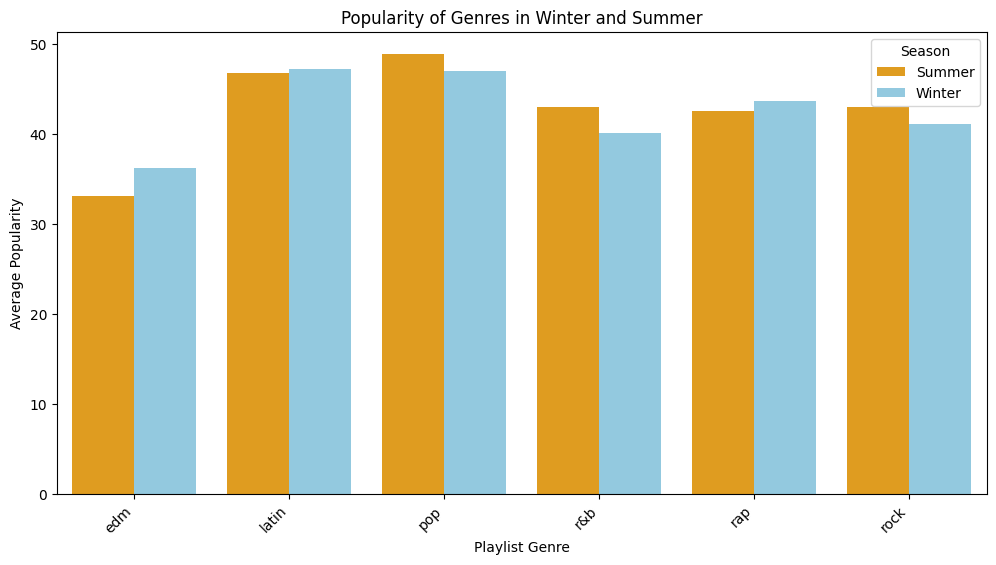

In [189]:
genre_season_popularity = data_clean.groupby(['Playlist Genre', 'Season'])['Popularity'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='Playlist Genre', y='Popularity', hue='Season', data=genre_season_popularity,
            palette={'Winter': 'skyblue', 'Summer': 'orange'})
plt.title('Popularity of Genres in Winter and Summer')
plt.xlabel('Playlist Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Season')
plt.show()

##Prediction

After a study on accuracy, we decided to change the Popularity_Label column to a binary column to have a more efficient predictive model.

In [190]:
data_clean['Popularity_Label'] = data_clean['Popularity'].apply(lambda x: 1 if x > 75 else 0)

In [191]:
columns_to_encode = ['Playlist Genre', 'Playlist Sub-Genre']
data_clean = pd.get_dummies(data_clean, columns=columns_to_encode, drop_first=True)

In [192]:
columns_to_remove = ['Id', 'Name', 'Artist', 'Popularity', 'Album', 'Album Name', 'Date',
                      'Playlist Name', 'Playlist Id', 'Month', 'Year', 'Season','Popularity_Label']
data_pred = data_clean.drop(columns=columns_to_remove)
data_pred['Popularity_Label'] = data_clean['Popularity_Label']

In [193]:
X = data_pred.drop("Popularity_Label", axis = 1)
y = data_pred['Popularity_Label']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Choosing the best prediction model with the best hyperparameters

In [ ]:
pip install Pillow

In [ ]:
pic = "ml_map.png"
image = Image.open(pic)
image = image.resize((800, 600))
display(image)

The choice of evaluation metrics depends on specific classification goals. Here's the selected metrics:

Accuracy: Widely used, it provides an overall performance view by measuring the proportion of correctly classified instances.

F1-Score: Balances precision and recall, making it valuable for imbalanced datasets where one class is significantly larger than the other.

AUC-ROC: Evaluates a model's ability to distinguish between positive and negative classes, especially useful in imbalanced scenarios or when false positives and false negatives have varying impacts. AUC-ROC provides a threshold-independent assessment.

Precision: Indicates the accuracy of positive predictions among all predicted positives.

In [ ]:
#These lists will be used for the comparison table at the end
models = []
list_test_accuracy = []
list_test_f1_score = []
list_test_auc_roc = []
list_precision = []
list_test_accuracy_grid = []
list_test_f1_score_grid = []
list_test_auc_roc_grid = []
list_precision_grid = []

#### Linear SVC

We have a classification problem here. We want to be able to predict whether a song is going to be popular or not. We therefore have a binary problem. According to the photo just above the Scikit Learn site, having less than 100K samples we must first begin to evaluate the effectiveness of the Linear Support Vector Classifier (Linear SVC).

In [ ]:
model1 = LinearSVC()
model1.fit(X_train, y_train)
test_pred = model1.predict(X_test)

test_pred

##### Without GridSearchCV :

In [ ]:
test_accuracy = accuracy_score(y_test, test_pred)
test_f1_score = f1_score(y_test, test_pred)
test_auc_roc = roc_auc_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)

list_test_accuracy.append(test_accuracy)
list_test_f1_score.append(test_f1_score)
list_test_auc_roc.append(test_auc_roc)
list_precision.append(precision)

In [ ]:
print(list_test_accuracy)
print(list_test_f1_score)
print(list_test_auc_roc)
print(list_precision)

[0.9249162351507767]
[0.0]
[0.5]
[0.0]


##### With GridSearchCV :

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'F1-Score': make_scorer(f1_score),
    'AUC-ROC': make_scorer(roc_auc_score)
}


In [ ]:
grid_search = GridSearchCV(model1, param_grid=param_grid, scoring=scoring, cv=5, refit='Accuracy')


In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}, refit='Accuracy',
             scoring={'AUC-ROC': make_scorer(roc_auc_score),
                      'Accuracy': make_scorer(accuracy_score),
                      'F1-Score': make_scorer(f1_score)})

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.001}


In [ ]:
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)

In [ ]:
test_accuracy_grid = accuracy_score(y_test, test_predictions)
test_f1_score_grid = f1_score(y_test, test_predictions)
test_auc_roc_grid = roc_auc_score(y_test, test_predictions)
precision_grid = precision_score(y_test, test_predictions)

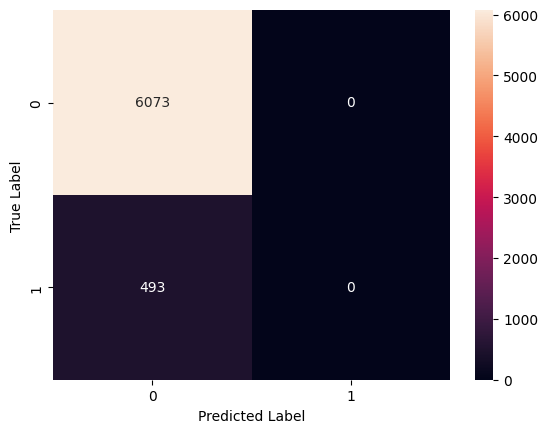

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
list_test_accuracy_grid.append(test_accuracy_grid)
list_test_f1_score_grid.append(test_f1_score_grid)
list_test_auc_roc_grid.append(test_auc_roc_grid)
list_precision_grid.append(precision_grid)

In [ ]:
print(list_test_accuracy_grid)
print(list_test_f1_score_grid)
print(list_test_auc_roc_grid)
print(list_precision_grid)

[0.9249162351507767]
[0.0]
[0.5]
[0.0]


We notice that the choice of hyperparameters has no effect on the evaluation metrics.

#### KNeighbors Classifier

Knowing that our data are not strings, according to the image on the Scikit Learn site, we must study the KNeighbors Classifier

##### Without GridSearchCV :

In [ ]:
model2 = KNeighborsClassifier()

In [ ]:
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
test_predictions_model2 = model2.predict(X_test)

In [ ]:
test_accuracy_model2 = accuracy_score(y_test, test_predictions_model2)
test_f1_score_model2 = f1_score(y_test, test_predictions_model2)
test_auc_roc_model2 = roc_auc_score(y_test, test_predictions_model2)
test_precision_model2 = precision_score(y_test, test_predictions_model2)

In [ ]:
print(list_test_accuracy)
print(list_test_f1_score)
print(list_test_auc_roc)
print(list_precision)

[0.9249162351507767]
[0.0]
[0.5]
[0.0]


##### With GridSearchCV :

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9]}
scoring = ['accuracy', 'f1', 'roc_auc', 'precision']

###### Scoring = 'accurancy'

In [ ]:
grid_search_model2 = GridSearchCV(model2, param_grid=param_grid, scoring='accuracy', cv=5)

In [ ]:
grid_search_model2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='accuracy')

In [ ]:
best_model_model2 = grid_search_model2.best_estimator_
best_model_model2

KNeighborsClassifier(n_neighbors=3)

###### Scoring = 'f1'

In [ ]:
grid_search_model2_2 = GridSearchCV(model2, param_grid, scoring='f1', cv=5)

In [ ]:
grid_search_model2_2.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='f1')

In [ ]:
best_model_model2_2 = grid_search_model2_2.best_estimator_
best_model_model2_2

KNeighborsClassifier(n_neighbors=3)

###### Scoring = 'roc_auc'

In [ ]:
grid_search_model2_3 = GridSearchCV(model2, param_grid, scoring='roc_auc', cv=5)

In [ ]:
grid_search_model2_3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='roc_auc')

In [ ]:
best_model_model2_3 = grid_search_model2_3.best_estimator_
best_model_model2_3

KNeighborsClassifier(n_neighbors=3)

###### Scoring = 'precision'

In [ ]:
grid_search_model2_4 = GridSearchCV(model2, param_grid, scoring='precision', cv=5)

In [ ]:
grid_search_model2_4.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='precision')

In [ ]:
best_model_model2_4 = grid_search_model2_4.best_estimator_
best_model_model2_4

KNeighborsClassifier(n_neighbors=3)

###### Testing KNeighbors Classifier with the best hyperparameter

In [ ]:
test_predictions_grid_model2 = best_model_model2.predict(X_test)

In [ ]:
test_accuracy_grid_model2 = accuracy_score(y_test, test_predictions_grid_model2)
test_f1_score_grid_model2 = f1_score(y_test, test_predictions_grid_model2)
test_auc_roc_grid_model2 = roc_auc_score(y_test, test_predictions_grid_model2)
test_precision_grid_model2 = precision_score(y_test, test_predictions_grid_model2)

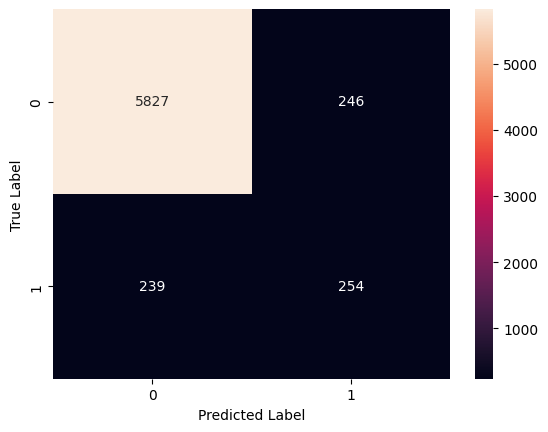

In [ ]:
cm = confusion_matrix(y_test, test_predictions_grid_model2)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
list_test_accuracy_grid.append(test_accuracy_grid_model2)
list_test_f1_score_grid.append(test_f1_score_grid_model2)
list_test_auc_roc_grid.append(test_auc_roc_grid_model2)
list_precision_grid.append(test_precision_grid_model2)

In [ ]:
print(list_test_accuracy)
print(list_test_f1_score)
print(list_test_auc_roc)
print(list_precision)

[0.9249162351507767]
[0.0]
[0.5]
[0.0]


#### RandomForestClassifier

From the same image path we've been following from the start, we now need to evaluate the "Ensemble Classifier", specifically "RandomForestClassifier".

##### Without GridSearchCV :

In [ ]:
model3 = RandomForestClassifier(random_state=42)

In [ ]:
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
test_predictions_model3 = model3.predict(X_test)

In [ ]:
test_accuracy_model3 = accuracy_score(y_test, test_predictions_model3)
test_f1_score_model3 = f1_score(y_test, test_predictions_model3)
test_auc_roc_model3 = roc_auc_score(y_test, test_predictions_model3)
test_precision_model3 = precision_score(y_test, test_predictions_model3)

In [ ]:
list_test_accuracy.append(test_accuracy_model3)
list_test_f1_score.append(test_f1_score_model3)
list_test_auc_roc.append(test_auc_roc_model3)
list_precision.append(test_precision_model3)

In [ ]:
print(list_test_accuracy)
print(list_test_f1_score)
print(list_test_auc_roc)
print(list_precision)

[0.9249162351507767, 0.9332927200731038]
[0.0, 0.26013513513513514]
[0.5, 0.5762820103881477]
[0.0, 0.7777777777777778]


##### With GridSearchCV :

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

###### Scoring = 'accurancy'

In [ ]:
grid_search_model3 = GridSearchCV(model3, param_grid=param_grid, scoring='accuracy', cv=5)

In [ ]:
grid_search_model3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_model_model3 = grid_search_model3.best_estimator_
best_param_model3 = grid_search_model3.best_params_
best_param_model3

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

###### Scoring = 'f1'

In [ ]:
grid_search_model3_2 = GridSearchCV(model3, param_grid, scoring='f1', cv=5)

In [ ]:
grid_search_model3_2.fit(X_train, y_train)

In [ ]:
best_model_model3_2 = grid_search_model3_2.best_estimator_
best_param_model3_2 = grid_search_model3_2.best_params_
best_param_model3_2

###### Scoring = 'roc_auc'

In [ ]:
grid_search_model3_3 = GridSearchCV(model3, param_grid=param_grid, scoring='roc_auc', cv=5)

In [ ]:
grid_search_model3_3.fit(X_train, y_train)

In [ ]:
best_model_model3_3 = grid_search_model3_3.best_estimator_
best_param_model3_3 = grid_search_model3_3.best_params_
best_param_model3_3

###### Scoring = 'precision'

In [ ]:
grid_search_model3_4 = GridSearchCV(model3, param_grid=param_grid, scoring='precision', cv=5)

In [ ]:
grid_search_model3_4.fit(X_train, y_train)

In [ ]:
best_model_model3_4 = grid_search_model3_4.best_estimator_
best_param_model3_4 = grid_search_model3_4.best_params_
best_param_model3_4

###### Testing KNeighbors Classifier with the best hyperparameter

Thus, the hyperparameters which are the most present are the following: min_samples_leaf: 2, min_samples_split: 2, n_estimators: 200

In [ ]:
test_predictions_grid_model3 = best_model_model3.predict(X_test)

In [ ]:
test_accuracy_grid_model3 = accuracy_score(y_test, test_predictions_grid_model3)
test_f1_score_grid_model3 = f1_score(y_test, test_predictions_grid_model3)
test_auc_roc_grid_model3 = roc_auc_score(y_test, test_predictions_grid_model3)
test_precision_grid_model3 = precision_score(y_test, test_predictions_grid_model3)

In [ ]:
list_test_accuracy_grid.append(test_accuracy_grid_model3)
list_test_f1_score_grid.append(test_f1_score_grid_model3)
list_test_auc_roc_grid.append(test_auc_roc_grid_model3)
list_precision_grid.append(test_precision_grid_model3)

In [ ]:
print(list_test_accuracy)
print(list_test_f1_score)
print(list_test_auc_roc)
print(list_precision)

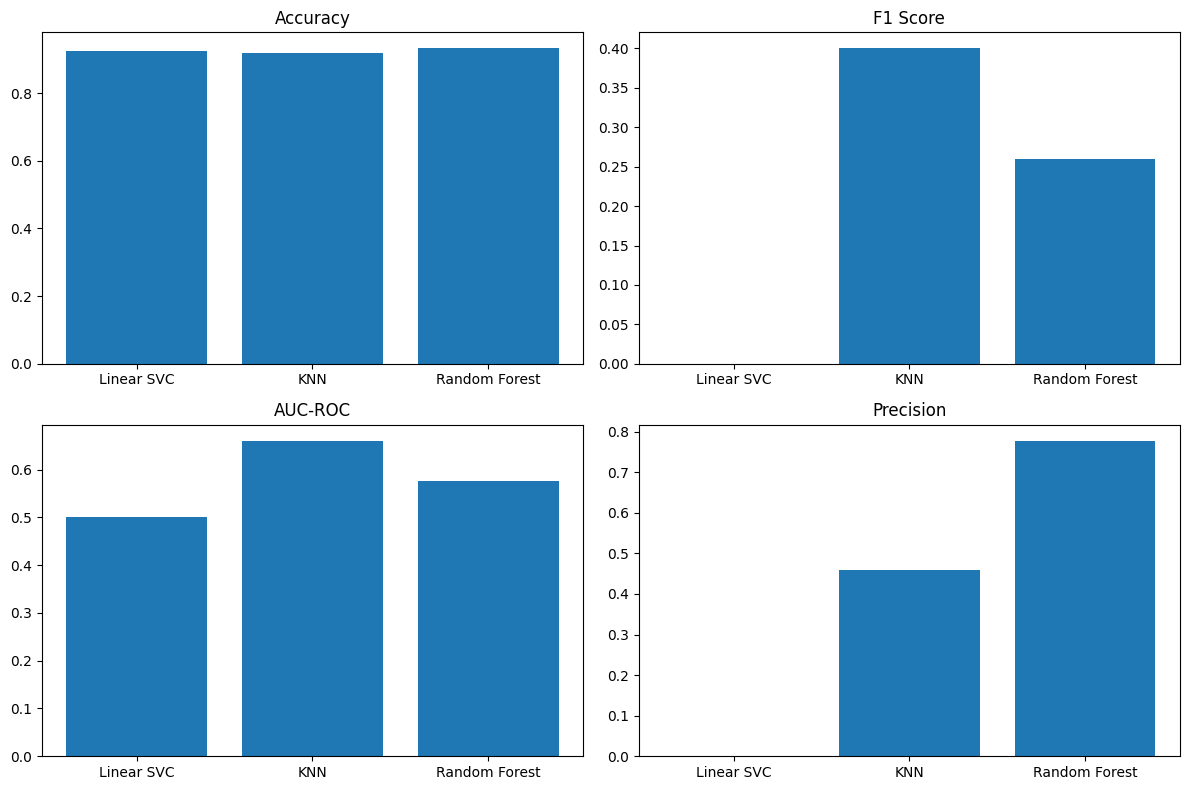

In [ ]:
labels = ['Linear SVC', 'KNN', 'Random Forest']
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].bar(labels, list_test_accuracy)
axs[0, 0].set_title('Accuracy')

axs[0, 1].bar(labels, list_test_f1_score)
axs[0, 1].set_title('F1 Score')

axs[1, 0].bar(labels, list_test_auc_roc)
axs[1, 0].set_title('AUC-ROC')

axs[1, 1].bar(labels, list_precision)
axs[1, 1].set_title('Precision')

plt.tight_layout()
plt.show()

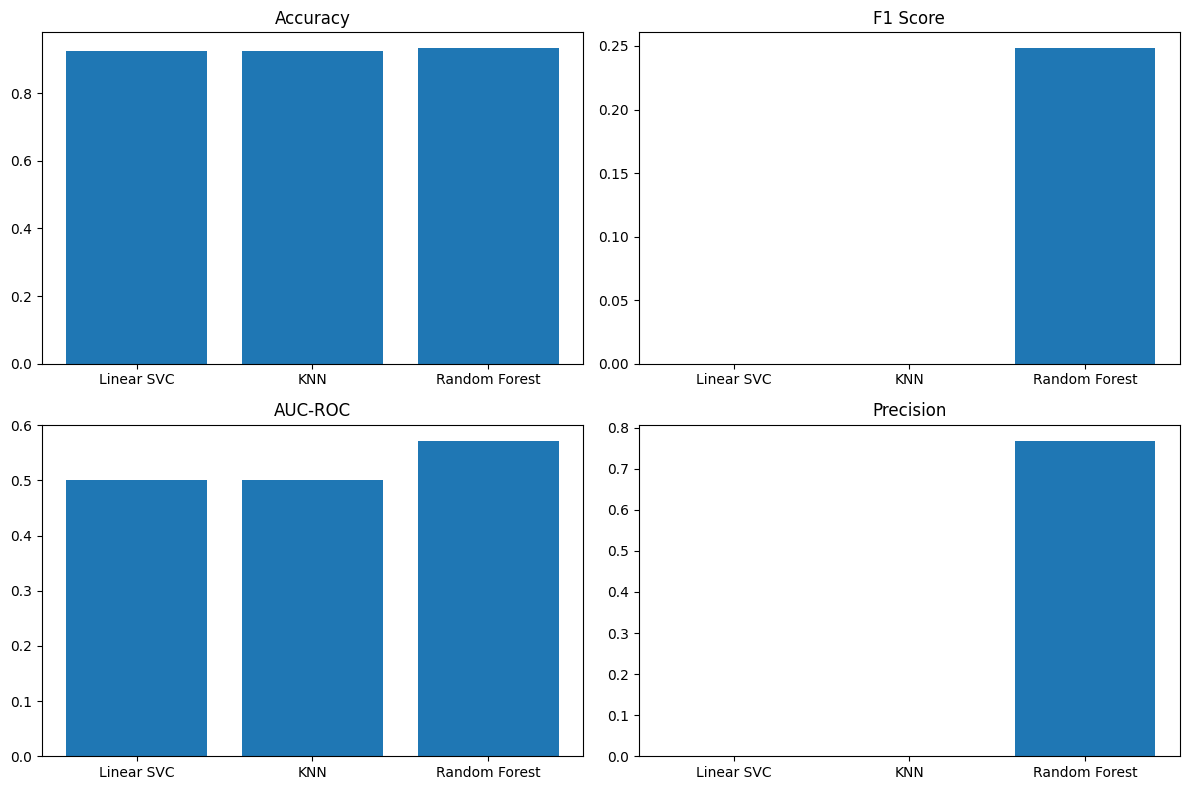

In [ ]:
labels = ['Linear SVC', 'KNN', 'Random Forest']
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].bar(labels, list_test_accuracy_grid)
axs[0, 0].set_title('Accuracy')

axs[0, 1].bar(labels, list_test_f1_score_grid)
axs[0, 1].set_title('F1 Score')

axs[1, 0].bar(labels, list_test_auc_roc_grid)
axs[1, 0].set_title('AUC-ROC')

axs[1, 1].bar(labels, list_precision_grid)
axs[1, 1].set_title('Precision')

plt.tight_layout()
plt.show()

Thus, among the results obtained the best accuracy is RandomForestClassifier, the best "f1 score" is that of KNeighbors Classifier, the best "auc_roc" is that of KNeighbors Classifier and the best precision is that of RandomForestClassifier. For the Django part, we chose the RandomForestClassifier to predict if a song would be popular or not.